In [1]:
using Modia
using Modia.Electric
using Modia.Rotational
using Modia.Blocks
using Plots

gr(size=(950,300))

┌ Info: Recompiling stale cache file /Users/roberto/.julia/compiled/v1.1/Modia/CBgbi.ji for Modia [cb905087-75eb-5f27-8515-1ce0ec8e839e]
└ @ Base loading.jl:1184


 

Welcome to Modia - Dynamic Modeling and Simulation with Julia
Version 0.3.0 (2019-04-07)
Type "?Modia" for help.


 
Importing ModiaMath Version 0.5.1 (2019-04-07)


┌ Info: Recompiling stale cache file /Users/roberto/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at _module.jl:82
└ @ Core /Users/roberto/.julia/packages/ModiaMath/FTD2B/src/Result/_module.jl:82


Plots.GRBackend()

In [38]:
@model circuito begin
    
    step1 = ConstantVoltage(V=1)
    #step2 = ConstantVoltage(V=2)
    
    resistor1=Resistor(R=100)
    resistor2=Resistor(R=220)
    inductor1=Inductor(L=0.010)
    #capacitor1=Capacitor(C=0.000047)
    #ground=Ground()
    
    @equations begin
        connect(step1.p, resistor1.p)
        connect(resistor1.n, inductor1.p)
        connect(inductor1.n, step1.n)
        connect(resistor1.n, resistor2.p)
        connect(resistor2.n, step1.n)
        #connect(step1.n, step1.n)
        
        #connect(step2.p, step1.n)
        #connect(capacitor1.p, step2.p)
        #connect(capacitor1.n, step2.n)
    end
end

result = simulate(circuito, 0.1)


Simulating model: circuito
Number of equations: 24
Number of variables: 25
Number of continuous states: 1


Dict{AbstractString,Any} with 41 entries:
  "step1.V"            => 1
  "resistor1.p.i"      => [0.003125, 0.00654572, 0.00826472, 0.00912808, 0.0095…
  "der(resistor1.v)"   => [3.125e7, 2375.72, 1193.15, 598.921, 301.392, 151.431…
  "der(resistor2.v)"   => [6.875e7, -2375.72, -1193.15, -598.921, -301.392, -15…
  "der(resistor2.i)"   => [312500.0, -10.7987, -5.42343, -2.72237, -1.36996, -0…
  "inductor1.L"        => 0.01
  "der(resistor1.p.v)" => [3.125e7, 2375.72, 1193.15, 598.921, 301.392, 151.431…
  "resistor2.n.i"      => [-0.003125, -0.00157013, -0.000788764, -0.000396327, …
  "step1.n.i"          => [0.003125, 0.00654572, 0.00826472, 0.00912808, 0.0095…
  "resistor1.R"        => 100
  "step1.p.v"          => [0.3125, 0.654572, 0.826472, 0.912808, 0.956156, 0.97…
  "resistor2.n.v"      => [-0.6875, -0.345428, -0.173528, -0.087192, -0.043844,…
  "resistor1.n.v"      => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  … …
  "resistor1.v"        => [0.3125, 0.654572, 0.826472, 0.91

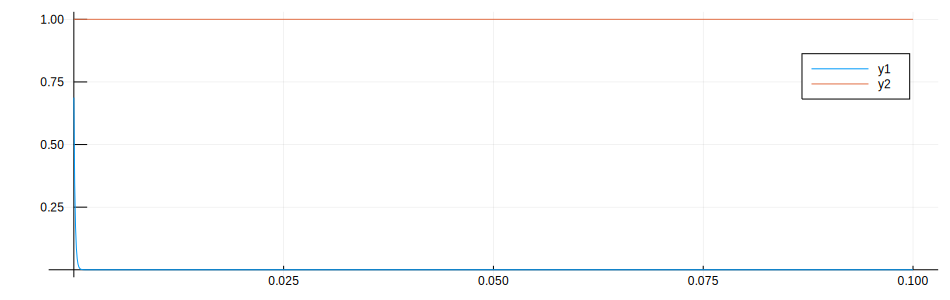

In [39]:
Plots.plot(result["time"], result["inductor1.v"])
Plots.plot!(result["time"], result["step1.v"])
plot!(frame_style=:origin)